# Random Forestiga anmete treenimne
Rando Roosik,
Madis Puu

### Vajalike teekide importimine

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.metrics import roc_curve, auc

### Laeme "train.csv" ja "test.csv" andmed

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"train.csv:\n {train.head()}\n\n")
print(f"test.csv:\n {test.head()}")

train.csv:
    id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0  

### Tühjendame "id" veeru, kuna see pole modelleerimisel kasulik.

In [7]:
train_data = train.drop(columns=['id'])
test_data = test.drop(columns=['id'])

### Teisendame kategoorilised veerud numbriteks, kasutades siltide kodeeringut.

kategooriliste andmete kodeerimise, et muuta need numbrilisteks väärtusteks, mida masinõppemudelid saavad töödelda.
1) categorical_columns loetleb andmestiku kategoorilised veerud, mis vajavad kodeerimist.
2) LabelEncoder() loob objekti, mis suudab kategoorilisi väärtusi numbrilisteks koodideks muuta.
3) le.fit_transform() treenib kodeerijat ja muudab treeningandmete kategoorilised väärtused numbrilisteks.
4) le.transform() rakendab sama kodeerimist testandmetele, et need oleks samamoodi kodeeritud.
5) label_encoders[col] salvestab iga veeru kodeerija objekti, et vajadusel saaks seda hiljem kasutada (nt kui on vaja uusi andmeid tagasi dekodeerida).
\

See etapp on oluline, et tagada, et kõik kategoorilised veerud oleksid masinõppemudeli jaoks sobivas vormingus, tagades sujuva treening- ja prognoosimisprotsessi.

In [9]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

### Treening- ja valideerimisandmete jaotamine.

valmistame andmed ette masinõppe mudeli treenimiseks, eraldades 80% andmetest treeninguks ja 20% valideerimiseks. Valideerimisandmete eesmärk on hinnata mudeli jõudlust treenimise ajal.

In [11]:
X = train_data.drop(columns=['loan_status'])
y = train_data['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest mudeli treenimine ja valideerimine

loome ja treenime Random Forest mudeli, kasutades treeningandmeid, et luua mudel, mis suudab ennustada sihtväärtusi. Pärast treenimist ennustatakse sihtväärtusi valideerimisandmetele, et hinnata mudeli täpsust ja jõudlust.

In [13]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)

### Klassifikatsiooniaruande kuvamine

Klassifikatsiooniaruanne annab põhjaliku ülevaate mudeli täpsusest, kutsumisest ja F1-skoorist, mis aitavad hinnata mudeli kvaliteeti erinevates klassides. See on kasulik, et mõista, kui hästi mudel suudab erinevaid klasse eristada ja milline on tema üldine toimivus.

In [15]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.91      0.70      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.88     11729
weighted avg       0.95      0.95      0.95     11729



### Segadusmaatriksi kuvamine ja detailide väljastamine.

Segadusmaatriks aitab visualiseerida, kuidas hästi mudel suudab erinevaid klasse eristada, näidates tõeliste ja valede positiivsete ja negatiivsete tulemuste arvu. Tõelised positiivsed (TP) ja negatiivsed (TN) näitavad õigesti prognoositud klasse, samas kui valed positiivsed (FP) ja negatiivsed (FN) näitavad vigu mudeli ennustustes.

In [17]:
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Confusion Matrix:
[[9978  109]
 [ 485 1157]]
True Negatives: 9978
False Positives: 109
False Negatives: 485
True Positives: 1157


### Omaduste tähtsuse kuvamine ja visualiseerimine.

Omaduste tähtsuse visualiseerimine aitab mõista, millised sisendi omadused mõjutavad mudeli ennustusi kõige rohkem. Tabel ja diagramm annavad selge ülevaate, millised omadused on olulised ja millised vähem olulised, mis võib aidata edasistes analüüsides ja omaduste valiku protsessis.

Feature Importances:
                       Feature  Importance
8          loan_percent_income    0.241612
7                loan_int_rate    0.139885
5                   loan_grade    0.119621
1                person_income    0.110978
2        person_home_ownership    0.092250
4                  loan_intent    0.070243
6                    loan_amnt    0.068559
3            person_emp_length    0.063685
0                   person_age    0.044902
10  cb_person_cred_hist_length    0.036807
9    cb_person_default_on_file    0.011458


C:\Users\roosi\AppData\Local\Temp\ipykernel_9464\1082295708.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


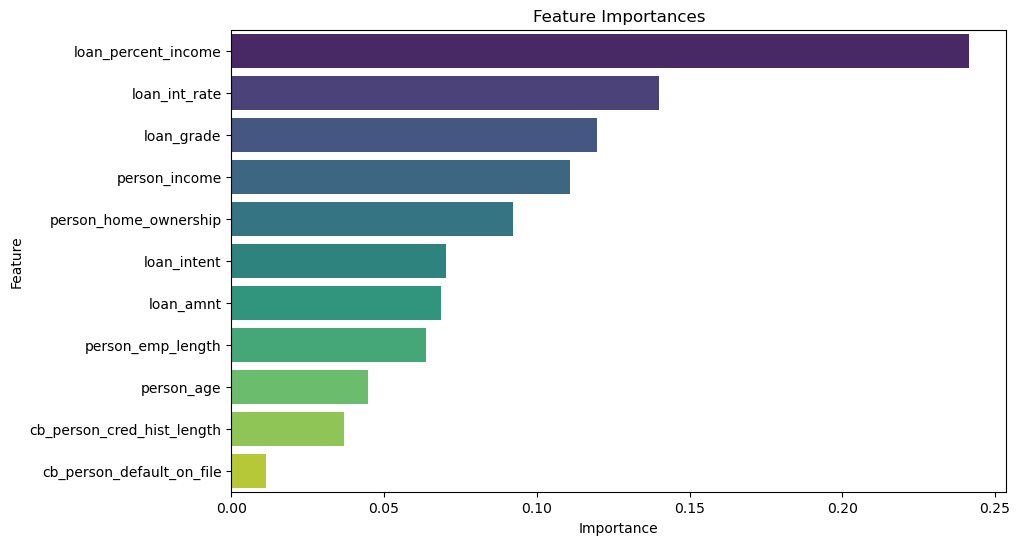

In [19]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Testandmete ennustuste tegemine ja tulemuste salvestamine.

testkomplekti ennustamine ja salvestame tulemused CSV faili, säilitades algse 'id' veeru. See võimaldab edaspidi kontrollida, milline on mudeli ennustus iga testandme jaoks. Ennustuste tulemuste vaatamine aitab hinnata mudeli toimivust ja valmistab ette tulemuste analüüsi.

In [21]:
X_test = test_data
print(X_test)
y_test_pred = rf_model.predict(X_test)

test_data_with_id = pd.read_csv('test.csv')
id_column = test_data_with_id['id']

predictions_df = pd.DataFrame({
    'id': id_column,
    'predicted_loan_status': y_test_pred
})

predictions_df.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'")

print("Predictions for Test Data:")
print(y_test_pred)

       person_age  person_income  person_home_ownership  person_emp_length  \
0              23          69000                      3                3.0   
1              26          96000                      0                6.0   
2              26          30000                      3                5.0   
3              33          50000                      3                4.0   
4              26         102000                      0                8.0   
...           ...            ...                    ...                ...   
39093          22          31200                      0                2.0   
39094          22          48000                      0                6.0   
39095          51          60000                      0                0.0   
39096          22          36000                      0                4.0   
39097          31          45000                      3                6.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_

### Testandmete ennustuste tulemuse tagasiside.

Saadud tulemuse estasime Kaggle võistlusele, mis oli juba möödas, kuid kust saime projekti idee ja andmed.

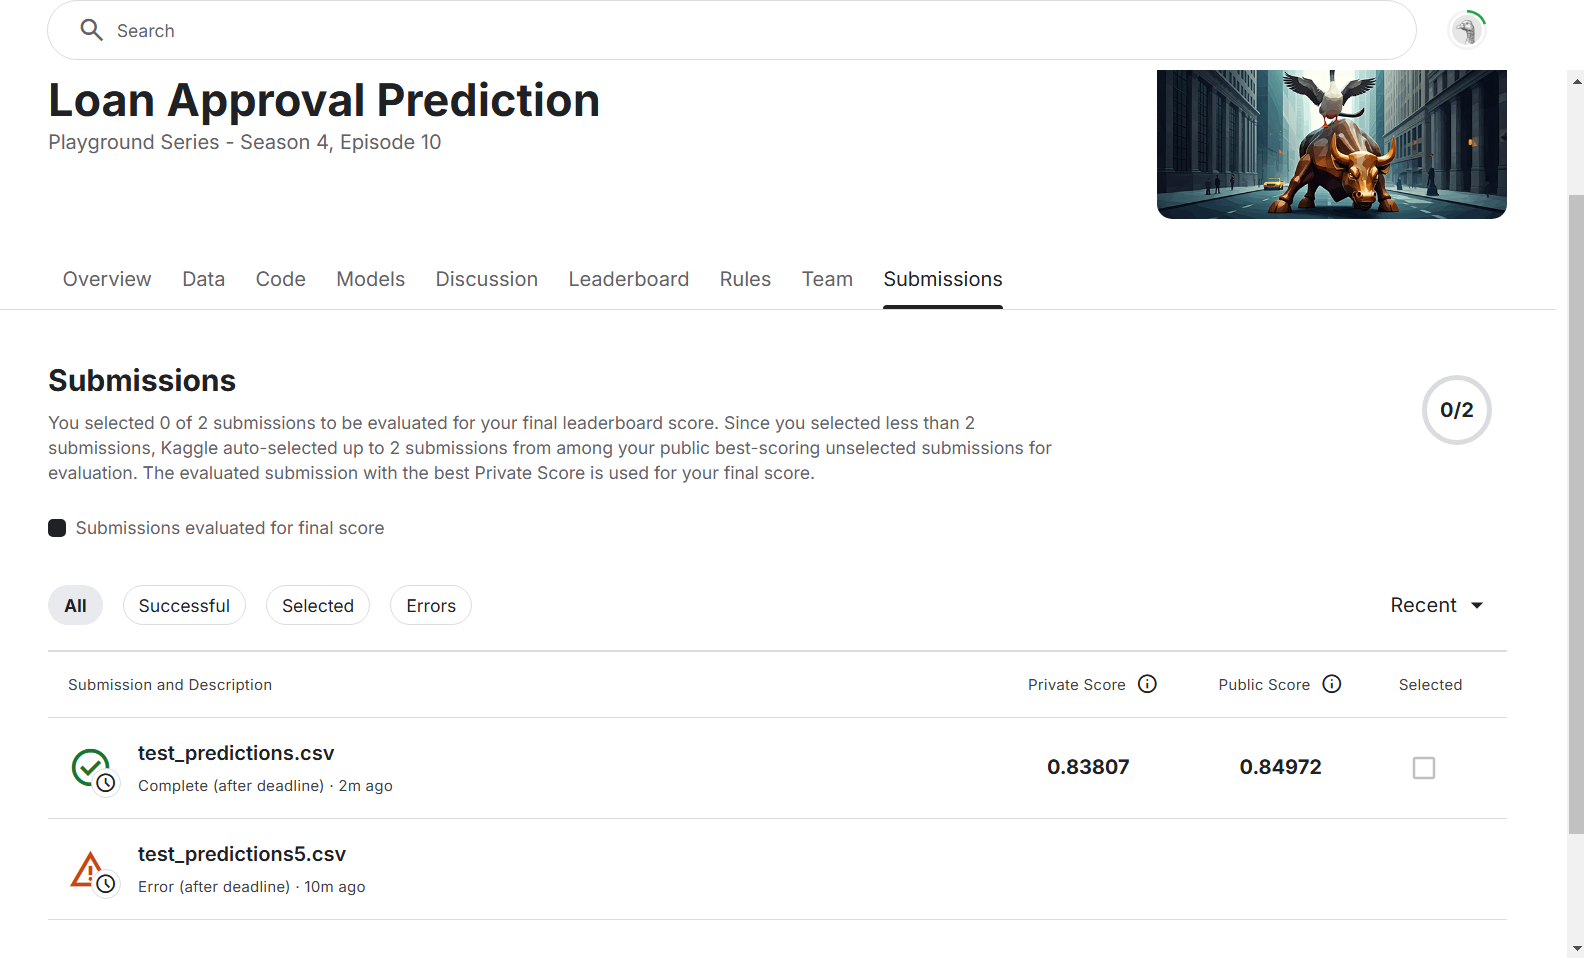

In [23]:
display(Image(filename='Kaggle_submission.png'))

### ROC-kõver koos AUC-iga

Arvutame ja kuvame ROC-kõvera (Receiver Operating Characteristic curve) koos AUC-iga (Area Under the Curve), mis on üks olulisemaid näitajaid, et hinnata mudeli kvaliteeti ja töövõimet. Kõverat arvutatakse kasutades mudeli prognoositavaid tõenäosusi, et leida suhe false positive rate (FPR) ja true positive rate (TPR) erinevate lävede korral.
1) ROC-kõver näitab mudeli suutlikkust eristada positiivseid ja negatiivseid klasse. Ideaalne mudel omaks kõverat, mis oleks võimalikult lähedal koordinaatsüsteemi ülemisele vasakule nurgale, kus TPR on maksimaalne ja FPR on minimaalne.
2) AUC (Area Under the Curve) on näitaja, mis mõõdab kogu kõvera pindala. Väärtus 1,0 tähistab ideaalset mudelit, samas kui väärtus 0,5 viitab juhuslikule klassifitseerimisele. Antud juhul on AUC väärtus mõeldud mudeli täpsuse ja töö kvaliteedi hindamiseks.
\
\
Sellel graafikul on AUC väärtus 0.94, mis viitab sellele, et mudel on väga hea, kuna see eristab positiivseid ja negatiivseid klasse suure täpsusega.

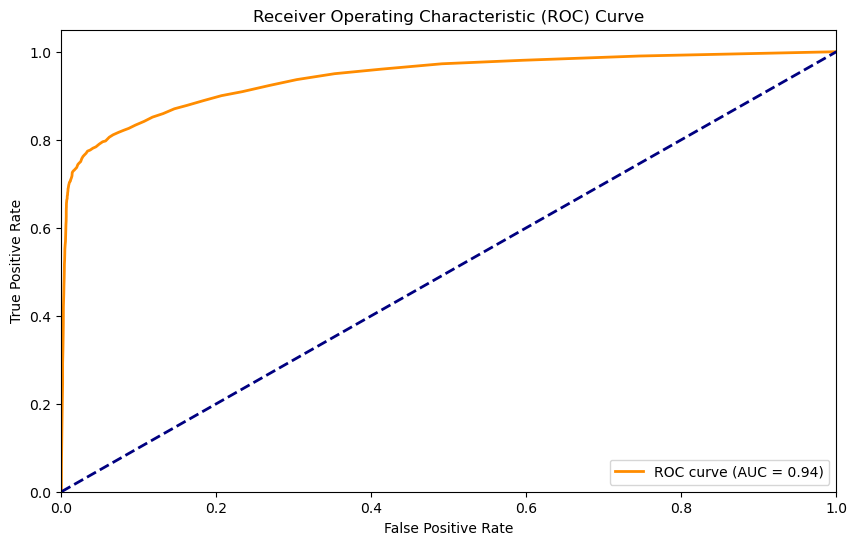

In [41]:
y_pred_prob = rf_model.predict_proba(X_val)[:, 1]  # Eeldame, et 1 on positiivne klass

fnr, tnr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fnr, tnr)

plt.figure(figsize=(10, 6))
plt.plot(fnr, tnr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()